In [46]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
# Authentication
apiKey = 'VP2mD4ivke1WlWkVQe7T34ptn'
apiSecret = 'N9dv79RVQ6NapqnNee7kiAFZ9nm245coxzWjvRVwG4l2J1ph6S'
accessToken = '1445345822-nAndvGtD4MbhO7Ia3hAwatlPcB31674jPubsRlW'
accessTokenSecret = 'YaWw7UjUkUbUpEWWmZ7rdfVguhp9ctMXwbmeR6ouLAFBc'

auth = tweepy.OAuthHandler(apiKey, apiSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [48]:
def percentage(part, whole):
    return 100 * float(part) / float(whole)

In [103]:
keyword = 'return AND to AND office'
noOfTweets = 100

# keyword = input('Please enter keyword or hashtag to search: ')
# noOfTweets = int(input('Please enter how many tweets to analyze: '))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweets)

In [105]:
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweets)
negative = percentage(negative, noOfTweets)
neutral = percentage(neutral, noOfTweets)
polarity = percentage(polarity, noOfTweets)
positive = format(positive, ".1f")
negative = format(negative, ".1f")
neutral = format(neutral, ".1f")

In [61]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  753
positive number:  219
negative number:  255
neutral number:  279


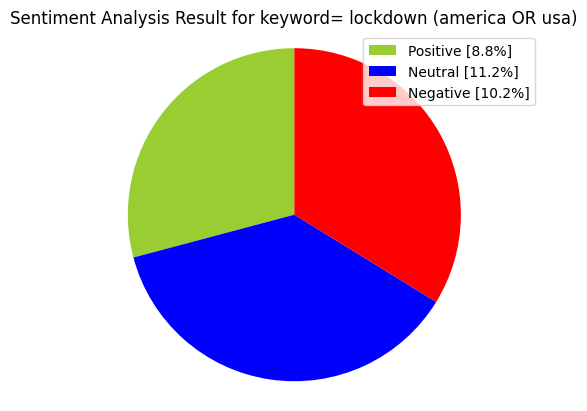

In [62]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]', 'Neutral ['+str(neutral)+'%]', 'Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue', 'red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword )
plt.axis('equal')
plt.show()

In [63]:
tweet_list

,0
0,RT @rupasubramanya: I got Omicron in Jan after...
1,RT @sbruffino: La fine della Pandemia: GilesTr...
2,RT @sbruffino: La fine della Pandemia: GilesTr...
3,@Piotr_Schramm Przebieg koronawirusowej hister...
4,RT @sbruffino: La fine della Pandemia: GilesTr...
...,...
748,RT @RyanChatterjee: +1 \n\n@JohnTory champione...
749,"In America during covid lockdown, Americans ru..."
750,2 years ago Sunday #DuaLipa released #FutureNo...
751,+1 \n\n@JohnTory championed the longest lockdo...


In [64]:
tweet_list.drop_duplicates(inplace=True)
tweet_list


,0
0,RT @rupasubramanya: I got Omicron in Jan after...
1,RT @sbruffino: La fine della Pandemia: GilesTr...
3,@Piotr_Schramm Przebieg koronawirusowej hister...
5,RT @Infoseepage: @armbrust_usa is having a sal...
6,RT @Ethica11y_Vegan: 🙏 MERCIFUL RESCUE FOR THI...
...,...
748,RT @RyanChatterjee: +1 \n\n@JohnTory champione...
749,"In America during covid lockdown, Americans ru..."
750,2 years ago Sunday #DuaLipa released #FutureNo...
751,+1 \n\n@JohnTory championed the longest lockdo...


In [68]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ',' ',x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)",' ',x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @rupasubramanya: I got Omicron in Jan after...,i got omicron in jan after my third dose otta...
1,RT @sbruffino: La fine della Pandemia: GilesTr...,la fine della pandemia gilestroll fa ultimo ...
3,@Piotr_Schramm Przebieg koronawirusowej hister...,schramm przebieg koronawirusowej histerii w ...
5,RT @Infoseepage: @armbrust_usa is having a sal...,usa is having a sale and you can now get th...
6,RT @Ethica11y_Vegan: 🙏 MERCIFUL RESCUE FOR THI...,merciful rescue for this puppy found living...
7,"RT @reneeygraham: In spring 2020, reports of C...",in spring 2020 reports of covid s racial dis...
9,@chinazdream @Ghira81 @nonexpedit Se non arriv...,se non arriva la roba cinese perche ogn...
10,@Tim_jbo @RodS108443078 @9NewsMelb @heidimur @...,jbo we were the talk of the globe ...
11,#lockdown #USAexposed #usa #coronavirus #covi...,lockdown usaexposed usa coronavirus covi...
12,La fine della Pandemia: GilesTroll fa ultimo t...,la fine della pandemia gilestroll fa ultimo t...


In [69]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @rupasubramanya: I got Omicron in Jan after...,i got omicron in jan after my third dose otta...,0.000000,0.000,neutral,0.000,1.000,0.000,0.0000
1,RT @sbruffino: La fine della Pandemia: GilesTr...,la fine della pandemia gilestroll fa ultimo ...,0.416667,0.500,positive,0.000,0.924,0.076,0.2023
3,@Piotr_Schramm Przebieg koronawirusowej hister...,schramm przebieg koronawirusowej histerii w ...,0.000000,0.000,neutral,0.000,1.000,0.000,0.0000
5,RT @Infoseepage: @armbrust_usa is having a sal...,usa is having a sale and you can now get th...,0.000000,0.000,neutral,0.000,1.000,0.000,0.0000
6,RT @Ethica11y_Vegan: 🙏 MERCIFUL RESCUE FOR THI...,merciful rescue for this puppy found living...,-1.000000,1.000,positive,0.138,0.714,0.147,0.0516
7,"RT @reneeygraham: In spring 2020, reports of C...",in spring 2020 reports of covid s racial dis...,0.166667,0.250,negative,0.223,0.777,0.000,-0.5574
9,@chinazdream @Ghira81 @nonexpedit Se non arriv...,se non arriva la roba cinese perche ogn...,-0.125000,0.375,neutral,0.000,1.000,0.000,0.0000
10,@Tim_jbo @RodS108443078 @9NewsMelb @heidimur @...,jbo we were the talk of the globe ...,-0.700000,0.800,negative,0.173,0.827,0.000,-0.3182
11,#lockdown #USAexposed #usa #coronavirus #covi...,lockdown usaexposed usa coronavirus covi...,-0.100000,0.050,neutral,0.000,1.000,0.000,0.0000
12,La fine della Pandemia: GilesTroll fa ultimo t...,la fine della pandemia gilestroll fa ultimo t...,0.416667,0.500,positive,0.000,0.921,0.079,0.2023


In [70]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [72]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage = round(data.loc[:, feature].value_counts(dropna=False, normalize=True) * 100, 2)
    return pd.concat([total, percentage], axis=1, keys = ['Total', 'Percentage'])


In [73]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,211,39.66
neutral,187,35.15
positive,134,25.19


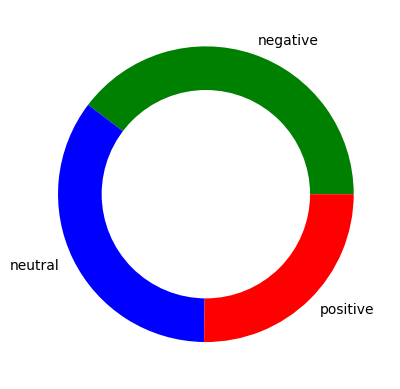

In [75]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list, "sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color = 'white')
plt.pie(size, labels=names, colors=['green', 'blue', 'red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [79]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", 
                    mask = mask, 
                    max_words=3000, 
                    stopwords=stopwords, 
                    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


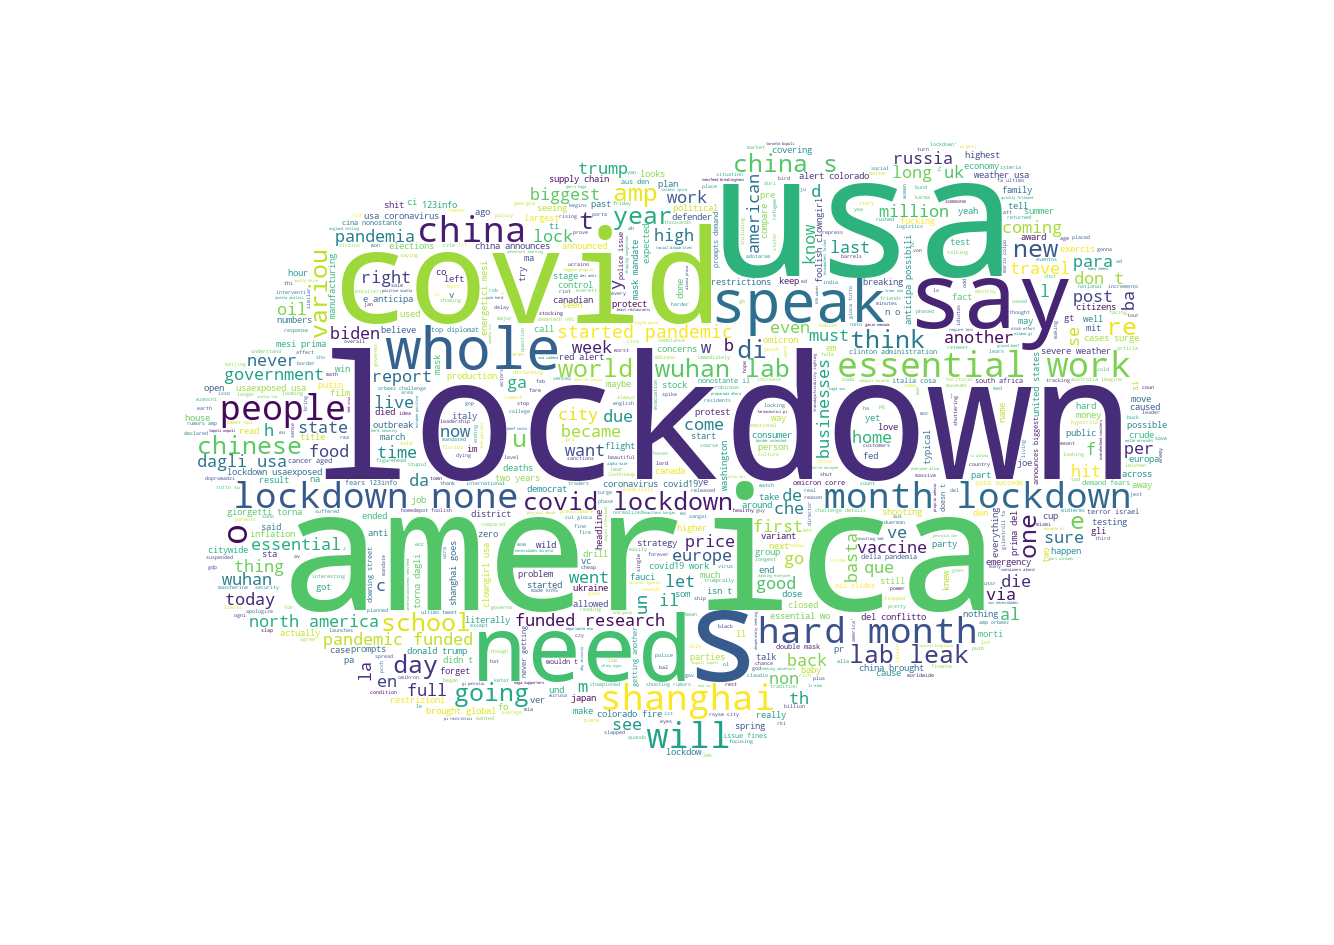

In [80]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


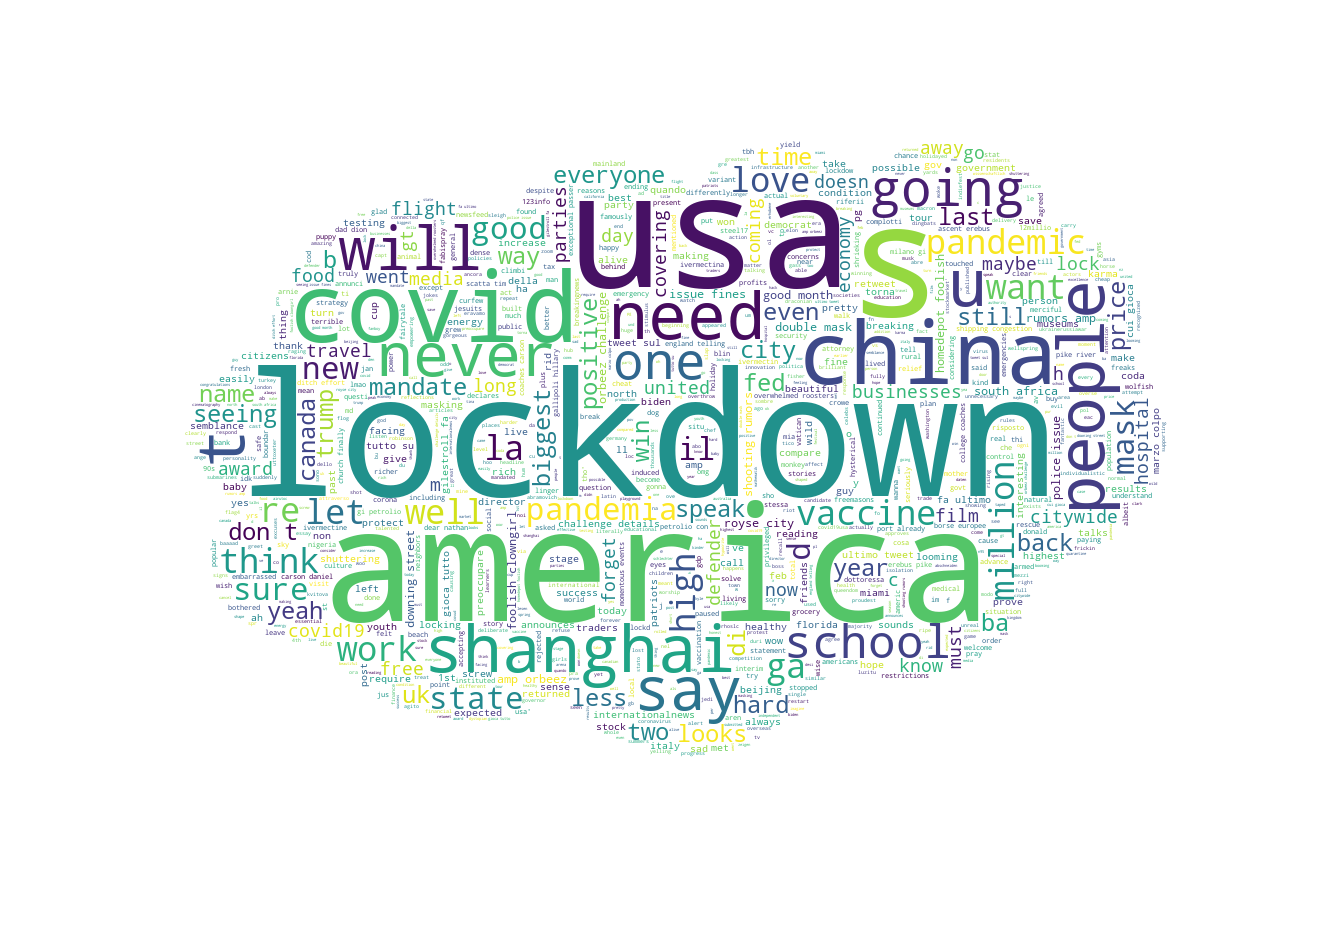

In [81]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive['text'].values)

Word Cloud Saved Successfully


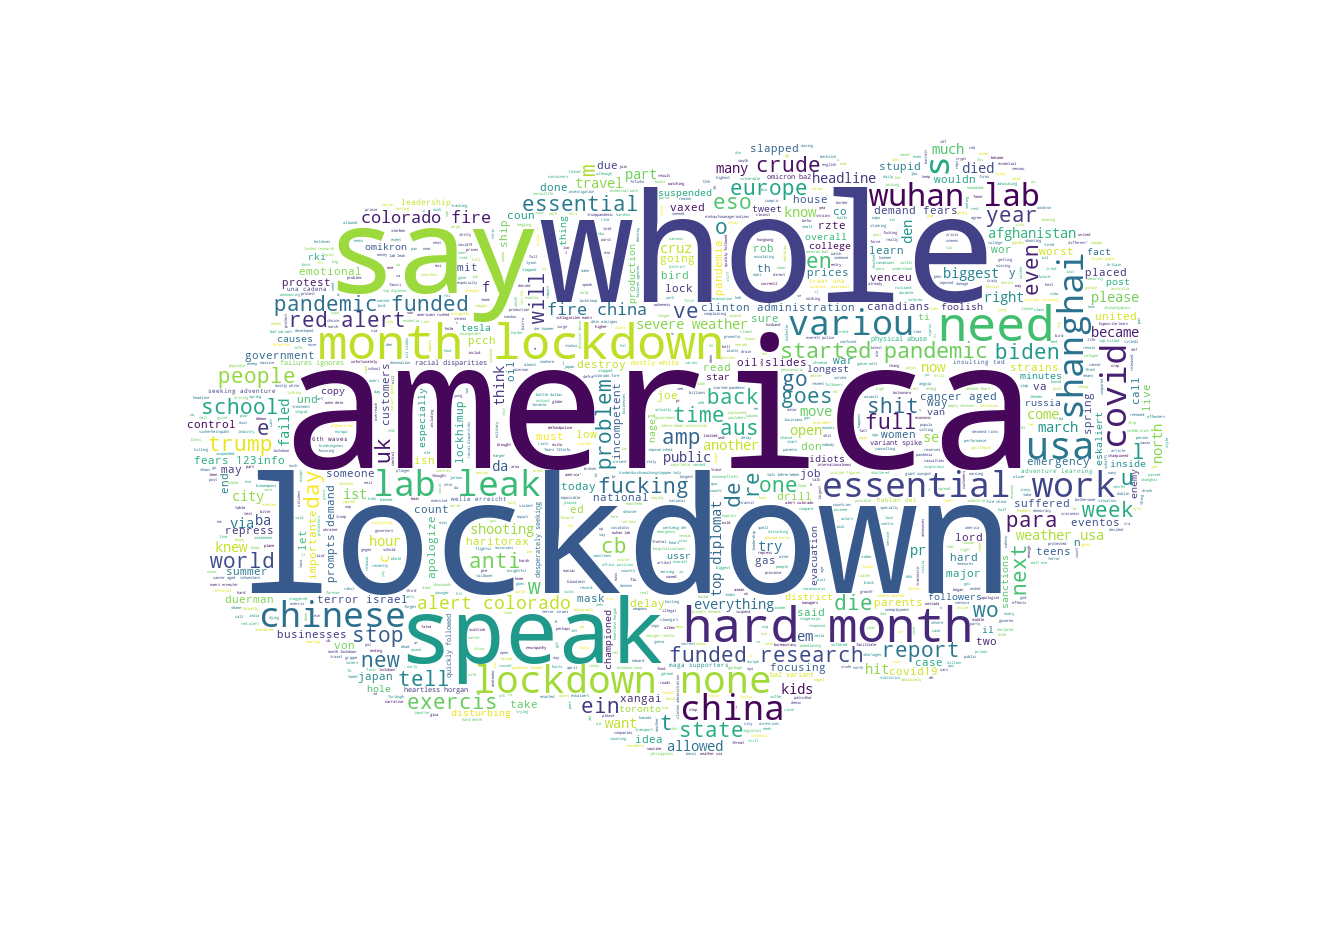

In [82]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

In [83]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,108.78
neutral,100.47
positive,105.46


In [84]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,19.41
neutral,16.65
positive,17.91


In [88]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text

#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

#Appliyng Stemmer
def stemming(text, ps):
    text = [ps.stem(word) for word in text]
    return text

#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [89]:
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
ps = nltk.PorterStemmer()
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x, ps))
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @rupasubramanya: I got Omicron in Jan after...,i got omicron in jan after my third dose otta...,0.000000,0.0,neutral,0.000,1.000,0.000,0.0000,121,24,i got omicron in jan after my third dose otta...,"[, i, got, omicron, in, jan, after, my, third,...","[, got, omicron, jan, third, dose, ottawa, sem...","[, got, omicron, jan, third, dose, ottawa, sem..."
1,RT @sbruffino: La fine della Pandemia: GilesTr...,la fine della pandemia gilestroll fa ultimo ...,0.416667,0.5,positive,0.000,0.924,0.076,0.2023,126,24,la fine della pandemia gilestroll fa ultimo ...,"[, la, fine, della, pandemia, gilestroll, fa, ...","[, la, fine, della, pandemia, gilestroll, fa, ...","[, la, fine, della, pandemia, gilestrol, fa, u..."
3,@Piotr_Schramm Przebieg koronawirusowej hister...,schramm przebieg koronawirusowej histerii w ...,0.000000,0.0,neutral,0.000,1.000,0.000,0.0000,113,15,schramm przebieg koronawirusowej histerii w ...,"[, schramm, przebieg, koronawirusowej, histeri...","[, schramm, przebieg, koronawirusowej, histeri...","[, schramm, przebieg, koronawirusowej, histeri..."
5,RT @Infoseepage: @armbrust_usa is having a sal...,usa is having a sale and you can now get th...,0.000000,0.0,neutral,0.000,1.000,0.000,0.0000,116,26,usa is having a sale and you can now get th...,"[, usa, is, having, a, sale, and, you, can, no...","[, usa, sale, get, us, made, kn5, masks, buck,...","[, usa, sale, get, us, made, kn5, mask, buck, ..."
6,RT @Ethica11y_Vegan: 🙏 MERCIFUL RESCUE FOR THI...,merciful rescue for this puppy found living...,-1.000000,1.0,positive,0.138,0.714,0.147,0.0516,120,19,merciful rescue for this puppy found living...,"[, merciful, rescue, for, this, puppy, found, ...","[, merciful, rescue, puppy, found, living, ter...","[, merci, rescu, puppi, found, live, terribl, ..."


In [96]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))

#print(countVectorizer.get_feature_names())

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names_out())
count_vect_df.head()

532 Number of reviews has 2003 words


,,ab,abaixo,abbiano,abc,abi,abl,abo,abr,abramovich,...,z,za,zachodni,zdf,zeigen,zeitung,zero,zniszczi,zoom,zu
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
lockdown,356
america,176
usa,136
covid,113
china,74
say,65
need,63
shanghai,57
speak,56
month,54


In [98]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
    
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'], (2,2), 20)
n2_bigrams

[('speak america', 54),
 ('say need', 54),
 ('month lockdown', 54),
 ('america say', 53),
 ('need hard', 50),
 ('hard month', 49),
 ('lockdown essential', 45),
 ('essential work', 35),
 ('covid 19', 25),
 ('america lockdown', 15),
 ('lab leak', 15),
 ('leak wuhan', 15),
 ('wuhan lab', 15),
 ('lab chinese', 15),
 ('chinese started', 15),
 ('started pandemic', 15),
 ('pandemic funded', 15),
 ('funded research', 15),
 ('covid lockdown', 13),
 ('research various', 13)]

In [99]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'], (3,3), 20)
n3_trigrams

[('speak america say', 53),
 ('america say need', 53),
 ('say need hard', 50),
 ('need hard month', 49),
 ('hard month lockdown', 49),
 ('month lockdown essential', 44),
 ('lockdown essential work', 35),
 ('lab leak wuhan', 15),
 ('leak wuhan lab', 15),
 ('wuhan lab chinese', 15),
 ('lab chinese started', 15),
 ('chinese started pandemic', 15),
 ('started pandemic funded', 15),
 ('pandemic funded research', 15),
 ('funded research various', 13),
 ('covid 19 lockdown', 11),
 ('lockdown usaexposed usa', 6),
 ('usaexposed usa coronavirus', 6),
 ('usa coronavirus covid19', 6),
 ('coronavirus covid19 work', 6)]